In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
DF = pd.read_excel('C:/data_final.xlsx')

# Data exploration

In [102]:
DF.head(20)

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
5,0.66,0.80,830.85
6,0.73,0.92,1038.09
7,0.57,0.43,455.19
8,0.43,0.89,640.17
9,0.27,0.95,511.06


In [103]:
DF.shape

(100, 3)

In [104]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [108]:
DF.isna().sum()

observation    0
feature        0
price          0
dtype: int64

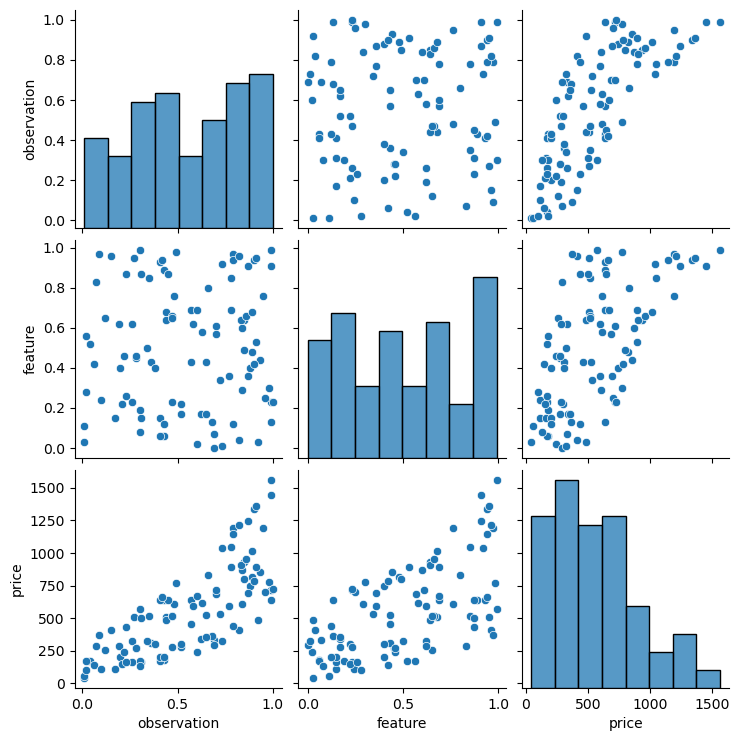

In [109]:
sns.pairplot(DF)
plt.show()

# Data preparation

In [122]:
#The 'feature' column is taken as X
#The 'observation' column data is a scaled down version of the serial 'number of observations' from 1-100
#Hence, the 'observation' column data does not hold any weightage to the house price prediction
#'price' which is to be predicted is taken as the dependent variable y
X=DF.iloc[:,-2].values
y=DF.iloc[:,-1].values

In [125]:
X_1D=X  #storing a 1-D version of X for polynomial curve plotting later
X=X.reshape(-1,1)
X

array([[0.68],
       [0.23],
       [0.29],
       [0.45],
       [0.83],
       [0.8 ],
       [0.92],
       [0.43],
       [0.89],
       [0.95],
       [0.06],
       [0.91],
       [0.69],
       [0.94],
       [0.06],
       [0.17],
       [0.66],
       [0.43],
       [0.64],
       [0.44],
       [0.93],
       [0.43],
       [0.85],
       [0.07],
       [0.52],
       [0.15],
       [0.13],
       [0.6 ],
       [0.4 ],
       [0.65],
       [0.17],
       [0.97],
       [0.04],
       [0.53],
       [0.85],
       [0.69],
       [0.22],
       [0.15],
       [0.02],
       [0.91],
       [0.76],
       [0.19],
       [0.62],
       [0.17],
       [0.69],
       [0.76],
       [0.23],
       [0.96],
       [0.03],
       [0.23],
       [0.11],
       [0.87],
       [0.97],
       [0.25],
       [0.58],
       [0.42],
       [0.24],
       [0.62],
       [0.15],
       [0.95],
       [0.64],
       [0.64],
       [0.4 ],
       [0.12],
       [0.22],
       [0.4 ],
       [0.

In [126]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [ ]:
#As the X is already normalized, there is no need to scale it.

In [318]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

# Visualizing house prices as polynomial functions

In [319]:
# to visualize the polynomial relation of house prices w.r.t the house features
# polynomial functions with different orders were fitted in the below 5 numpy plots
# polynomial functions were tested for the degrees --> {3,6,9,12,15}

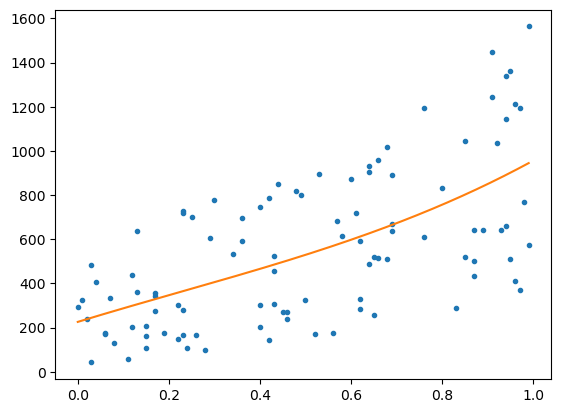

In [320]:
z = np.polyfit(X_1D, y, 3)
p = np.poly1d(z)
xp = np.linspace(X_1D.min(), X_1D.max(), 1000)
plt.plot(X_1D, y, '.', xp, p(xp), '-')
plt.show()

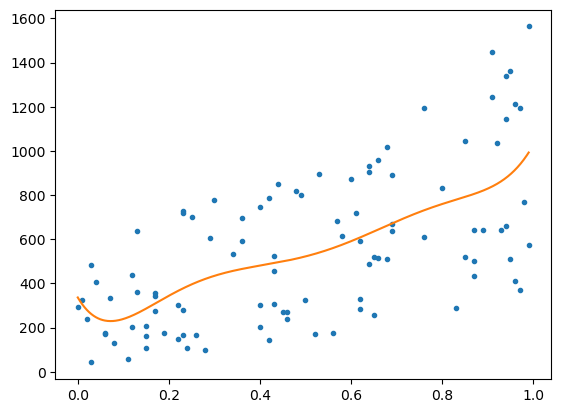

In [321]:
z = np.polyfit(X_1D, y, 6)
p = np.poly1d(z)
xp = np.linspace(X_1D.min(), X_1D.max(), 1000)
plt.plot(X_1D, y, '.', xp, p(xp), '-')
plt.show()

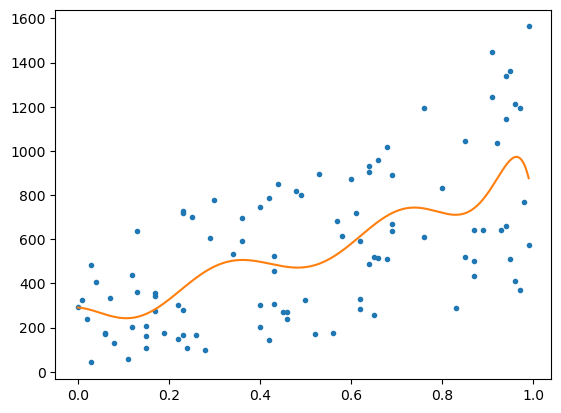

In [322]:
z = np.polyfit(X_1D, y, 9)
p = np.poly1d(z)
xp = np.linspace(X_1D.min(), X_1D.max(), 1000)
plt.plot(X_1D, y, '.', xp, p(xp), '-')
plt.show()

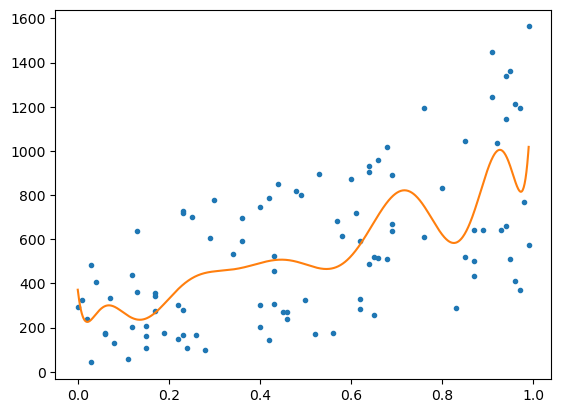

In [323]:
z = np.polyfit(X_1D, y, 12)
p = np.poly1d(z)
xp = np.linspace(X_1D.min(), X_1D.max(), 1000)
plt.plot(X_1D, y, '.', xp, p(xp), '-')
plt.show()

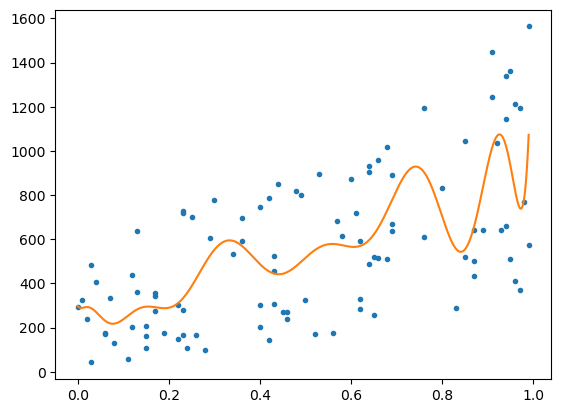

In [324]:
z = np.polyfit(X_1D, y, 15)
p = np.poly1d(z)
xp = np.linspace(X_1D.min(), X_1D.max(), 1000)
plt.plot(X_1D, y, '.', xp, p(xp), '-')
plt.show()

# Model building, evaluation, error calculation and final conclusions

In [ ]:
#It is mentioned in the question that there is already an insight available from the dataset
#The house price is a polynomial function of the 'feature' (X) variable with order<4
#Hence, in the below section, models were built and evaluated for different polynomial functions with orders in {1,2,3,4}

In [325]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
reg=PolynomialFeatures(degree=4)
X_train_poly=reg.fit_transform(X_train)
model=LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [326]:
X_test_poly=reg.fit_transform(X_test)
y_pred=model.predict(X_test_poly)

In [327]:
from sklearn import metrics
# accuracy for the polynomial fucntion with order=4
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', metrics.r2_score(y_test, y_pred))
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 231.65739016193638
Mean Squared Error (MSE): 74348.89566599306
Root Mean Squared Error (RMSE): 272.6699390581827
R2 score: 0.31948939143093424
Mean Absolute Percentage Error (MAPE): 0.505647377577403
Accuracy: 49.44


In [328]:
reg=PolynomialFeatures(degree=3)
X_train_poly=reg.fit_transform(X_train)
model=LinearRegression()
model.fit(X_train_poly,y_train)
X_test_poly=reg.fit_transform(X_test)
y_pred=model.predict(X_test_poly)

# accuracy for the polynomial fucntion with order=3

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', metrics.r2_score(y_test, y_pred))
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 232.16890816149888
Mean Squared Error (MSE): 74505.63083167672
Root Mean Squared Error (RMSE): 272.95719596976505
R2 score: 0.31805480464886937
Mean Absolute Percentage Error (MAPE): 0.506800742768858
Accuracy: 49.32


# Best model accuracy obtained (below snippet)

In [329]:
reg=PolynomialFeatures(degree=2)
X_train_poly=reg.fit_transform(X_train)
model=LinearRegression()
model.fit(X_train_poly,y_train)
X_test_poly=reg.fit_transform(X_test)
y_pred=model.predict(X_test_poly)

# accuracy for the polynomial fucntion with order=2

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', metrics.r2_score(y_test, y_pred))
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 224.68222632276897
Mean Squared Error (MSE): 72587.57958185603
Root Mean Squared Error (RMSE): 269.42082247268127
R2 score: 0.33561060304493284
Mean Absolute Percentage Error (MAPE): 0.4755447061477512
Accuracy: 52.45


In [330]:
reg=PolynomialFeatures(degree=1)
X_train_poly=reg.fit_transform(X_train)
model=LinearRegression()
model.fit(X_train_poly,y_train)
X_test_poly=reg.fit_transform(X_test)
y_pred=model.predict(X_test_poly)

# accuracy for the polynomial fucntion with order=1

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', metrics.r2_score(y_test, y_pred))
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 227.3267852141465
Mean Squared Error (MSE): 72583.12244693995
Root Mean Squared Error (RMSE): 269.41255064851737
R2 score: 0.3356513989110591
Mean Absolute Percentage Error (MAPE): 0.49357718023289693
Accuracy: 50.64


In [239]:
#Multiple results were compared across model outputs where the test set size varied from 20% to 60% of dataset and was randomly sampled.
#The best result was observed wherein the polynomial function with order=2 gave 52.45% accuracy
#And the test set was randomly sampled 30% of the full dataset.